# 1. Clean Data

## 1.1. Read Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import datetime

# ******* Usser Input ********
di = "/Users/zxz1997/Desktop/AlphaStudio Challenge"
folder = 'Stock Returns'

In [3]:
os.chdir(di + '/' + folder)
rt = pd.read_csv('returns_20181228.csv')

rt.head()

,Date,stock_0,stock_1,stock_2,stock_3,stock_4,stock_5,stock_6,stock_7,stock_8,...,stock_1131,stock_1132,stock_1133,stock_1134,stock_1135,stock_1136,stock_1137,stock_1138,stock_1139,stock_1140
0,1990-01-03,-0.561639,0.113423,-1.580584,-0.017527,1.055723,1.306785,-0.692687,1.303057,-0.243042,...,1.410213,-0.307705,0.829215,-0.505364,0.232976,-0.393465,-0.471561,-0.308961,-0.202832,-0.205398
1,1990-01-04,-1.841947,0.463435,-1.172764,0.513875,2.470817,0.463057,0.427191,-0.737959,1.455408,...,-0.656517,-1.327001,0.770307,0.485192,-0.199085,-0.590958,-0.513262,0.369685,-0.549467,0.279644
2,1990-01-05,-0.277859,0.216396,-0.429848,0.802112,2.686740,0.059472,-0.895917,-0.785620,0.022776,...,0.098997,0.197211,-2.003799,2.101860,0.442342,-0.677487,-0.955708,0.926602,-0.762952,2.046626
3,1990-01-08,-0.881483,1.867996,-1.659936,0.313561,0.868181,-1.923021,-1.788387,2.902709,0.600026,...,-0.366244,0.480905,-0.780784,-0.131875,-0.657870,-1.526045,-0.140225,1.410707,0.168989,0.787590
4,1990-01-09,-0.534578,0.413210,0.004407,1.223128,0.972728,1.420754,1.864039,1.564482,0.243046,...,1.469816,0.017081,-1.603788,-2.895389,0.540079,-1.126372,-1.737689,1.036790,1.243899,0.069950


In [4]:
rt.tail()

,Date,stock_0,stock_1,stock_2,stock_3,stock_4,stock_5,stock_6,stock_7,stock_8,...,stock_1131,stock_1132,stock_1133,stock_1134,stock_1135,stock_1136,stock_1137,stock_1138,stock_1139,stock_1140
993,1993-10-26,-1.313074,-1.379374,-0.906983,-0.305957,-1.324885,0.0,1.471651,-0.376970,-1.292054,...,1.682796,-0.645304,0.847891,-2.225868,-1.188681,-1.135176,-1.339876,-0.379312,-0.076701,-2.230776
994,1993-10-27,0.043880,-0.046315,-1.785693,-1.176410,0.781855,0.0,-1.297261,-1.032418,0.780116,...,0.635486,1.174134,-0.785528,1.095103,-0.297617,-0.064334,0.067424,0.249385,0.225230,1.319785
995,1993-10-28,0.577029,0.171293,0.935207,1.564218,1.496248,0.0,0.728508,0.434053,-0.460686,...,-0.574689,-0.876506,2.286041,-0.436680,1.192864,0.158223,-0.534242,0.610552,0.102812,-1.124483
996,1993-10-29,0.071906,1.024123,-0.852352,-0.516366,-1.677940,0.0,0.604916,-0.672234,-0.774075,...,0.891785,0.652450,-0.780891,-0.143762,0.701370,1.411639,0.542750,0.344180,-2.200041,1.251043
997,1993-11-01,-0.370108,-1.149209,0.991778,-0.998532,-0.157051,0.0,-0.201675,0.377220,0.646046,...,1.244620,-0.152889,0.123395,0.585901,-0.121264,0.212339,0.368451,-0.467768,0.363672,1.935147


## 1.2 Check Data

* Note that there are some missing values at column "stock_5", and there has possibility that other columns also have missing entries

In [5]:
# check data types
def check_dtype(x, dtype):
    if x == dtype: return False
    else: return True
rt.dtypes.index[rt.dtypes.apply(lambda x: check_dtype(x, 'float64'))]

Index(['Date'], dtype='object')

* Note that the data type of "Date" is string, which should be datetime
* Other data are all in type of 'float64'

In [6]:
# check total col & row number
rt.shape

(998, 1141)

In [7]:
# check statistics
rt.describe(include = 'all')

,Date,stock_0,stock_1,stock_2,stock_3,stock_4,stock_5,stock_6,stock_7,stock_8,...,stock_1131,stock_1132,stock_1133,stock_1134,stock_1135,stock_1136,stock_1137,stock_1138,stock_1139,stock_1140
count,998,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,997.000000,...,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000
unique,998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1992-03-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,-0.026966,-0.020554,-0.113427,0.033353,0.099562,-0.009026,-0.031560,-0.004426,0.027225,...,0.058604,-0.014405,-0.001513,0.017325,-0.074002,0.014885,-0.029956,0.024856,0.054927,0.099044
std,NaN,1.079548,1.069224,1.290938,1.315248,1.160148,0.618043,1.047996,0.950499,1.008989,...,1.053655,1.508109,1.052172,1.037901,1.211205,1.012770,1.094876,1.397911,1.173167,1.290775
min,NaN,-3.445275,-3.349314,-6.253386,-4.962308,-3.381999,-2.882329,-3.059654,-2.979244,-3.607777,...,-3.371007,-5.071165,-2.888055,-2.895389,-3.835568,-3.495161,-3.767086,-4.187504,-4.385589,-4.263126
25%,NaN,-0.728042,-0.755562,-0.971178,-0.846885,-0.676393,0.000000,-0.689763,-0.656540,-0.613888,...,-0.682255,-0.961652,-0.716491,-0.688924,-0.929342,-0.635169,-0.808546,-0.893086,-0.716392,-0.803568
50%,NaN,-0.047101,-0.067566,-0.033536,0.032021,0.047723,0.000000,-0.045467,0.021217,0.009594,...,0.025207,-0.012673,-0.043413,0.030634,-0.044181,0.016468,-0.021995,0.060071,0.028155,0.069207
75%,NaN,0.695686,0.675765,0.766773,0.924441,0.883920,0.000000,0.651894,0.632684,0.669867,...,0.783900,0.902698,0.719186,0.711660,0.699917,0.667453,0.702350,0.945649,0.800193,1.039836


In [8]:
# check columns containing NaN
nan = rt.loc[:,rt.count() < rt.shape[0]].columns
nan

Index(['stock_8', 'stock_18', 'stock_21', 'stock_71', 'stock_79', 'stock_81',
       'stock_85', 'stock_86', 'stock_97', 'stock_108', 'stock_123',
       'stock_130', 'stock_133', 'stock_136', 'stock_144', 'stock_146',
       'stock_157', 'stock_172', 'stock_181', 'stock_198', 'stock_208',
       'stock_210', 'stock_213', 'stock_214', 'stock_234', 'stock_241',
       'stock_247', 'stock_259', 'stock_264', 'stock_299', 'stock_310',
       'stock_312', 'stock_315', 'stock_318', 'stock_337', 'stock_353',
       'stock_356', 'stock_367', 'stock_376', 'stock_380', 'stock_381',
       'stock_405', 'stock_410', 'stock_421', 'stock_431', 'stock_433',
       'stock_437', 'stock_442', 'stock_448', 'stock_470', 'stock_472',
       'stock_474', 'stock_476', 'stock_487', 'stock_491', 'stock_495',
       'stock_500', 'stock_503', 'stock_512', 'stock_541', 'stock_549',
       'stock_571', 'stock_573', 'stock_580', 'stock_592', 'stock_600',
       'stock_615', 'stock_676', 'stock_677', 'stock_689', 's

## 1.3 Observations and Solutions

1. Column "Date"
    * [obs] data type is string
    * [sol] convert to datetime, resample to business date
    
2. multiple stock return columns
    * [obs] contain consecutive zeros, which might be missing data
    * [sol] ignore thoses columns


## 1.4 Clean Process

### 1.4.1 Drop Columns with Missing Data

In [9]:
# drop columns containing NaN
clean = rt.drop(nan, axis = 1)
clean.shape

(998, 1049)

In [10]:
len((clean==0.000000).any(axis=0).index)

1049

* Note that all cleaned columns contain strict zero, so we conpromise to drop column which have more than 10% zeros. 
    * The `threshold` can be changed, with smaller value meaning that more data are ignored.

In [11]:
# drop columns which have zeros more than 10%
threshold = 0.1 
zeros = clean.columns[(clean == 0).sum() > threshold * clean.shape[0]]

In [12]:
clean = clean.drop(zeros, axis = 1)
clean.shape

(998, 957)

### 1.4.2 Clean Date

In [13]:
# convert data type in "Date" from object to datetime
clean['Date'] = pd.to_datetime(clean['Date'], format='%Y-%m-%d', errors='ignore')

In [14]:
# set "Date" as new index
clean.set_index('Date', inplace=True)
clean.head()

,stock_0,stock_1,stock_2,stock_3,stock_4,stock_6,stock_7,stock_9,stock_10,stock_11,...,stock_1131,stock_1132,stock_1133,stock_1134,stock_1135,stock_1136,stock_1137,stock_1138,stock_1139,stock_1140
Date,,,,,,,,,,,,,,,,,,,,,
1990-01-03,-0.561639,0.113423,-1.580584,-0.017527,1.055723,-0.692687,1.303057,0.081520,-0.179812,1.193591,...,1.410213,-0.307705,0.829215,-0.505364,0.232976,-0.393465,-0.471561,-0.308961,-0.202832,-0.205398
1990-01-04,-1.841947,0.463435,-1.172764,0.513875,2.470817,0.427191,-0.737959,0.971196,1.910372,1.290894,...,-0.656517,-1.327001,0.770307,0.485192,-0.199085,-0.590958,-0.513262,0.369685,-0.549467,0.279644
1990-01-05,-0.277859,0.216396,-0.429848,0.802112,2.686740,-0.895917,-0.785620,-1.336882,-0.133978,0.480175,...,0.098997,0.197211,-2.003799,2.101860,0.442342,-0.677487,-0.955708,0.926602,-0.762952,2.046626
1990-01-08,-0.881483,1.867996,-1.659936,0.313561,0.868181,-1.788387,2.902709,-0.943956,-0.574076,-0.049026,...,-0.366244,0.480905,-0.780784,-0.131875,-0.657870,-1.526045,-0.140225,1.410707,0.168989,0.787590
1990-01-09,-0.534578,0.413210,0.004407,1.223128,0.972728,1.864039,1.564482,1.345295,-0.137125,-0.266751,...,1.469816,0.017081,-1.603788,-2.895389,0.540079,-1.126372,-1.737689,1.036790,1.243899,0.069950


In [15]:
# resample to business date
bd_idx = clean.resample('B').last().ffill()
bd_idx.head()

,stock_0,stock_1,stock_2,stock_3,stock_4,stock_6,stock_7,stock_9,stock_10,stock_11,...,stock_1131,stock_1132,stock_1133,stock_1134,stock_1135,stock_1136,stock_1137,stock_1138,stock_1139,stock_1140
Date,,,,,,,,,,,,,,,,,,,,,
1990-01-03,-0.561639,0.113423,-1.580584,-0.017527,1.055723,-0.692687,1.303057,0.081520,-0.179812,1.193591,...,1.410213,-0.307705,0.829215,-0.505364,0.232976,-0.393465,-0.471561,-0.308961,-0.202832,-0.205398
1990-01-04,-1.841947,0.463435,-1.172764,0.513875,2.470817,0.427191,-0.737959,0.971196,1.910372,1.290894,...,-0.656517,-1.327001,0.770307,0.485192,-0.199085,-0.590958,-0.513262,0.369685,-0.549467,0.279644
1990-01-05,-0.277859,0.216396,-0.429848,0.802112,2.686740,-0.895917,-0.785620,-1.336882,-0.133978,0.480175,...,0.098997,0.197211,-2.003799,2.101860,0.442342,-0.677487,-0.955708,0.926602,-0.762952,2.046626
1990-01-08,-0.881483,1.867996,-1.659936,0.313561,0.868181,-1.788387,2.902709,-0.943956,-0.574076,-0.049026,...,-0.366244,0.480905,-0.780784,-0.131875,-0.657870,-1.526045,-0.140225,1.410707,0.168989,0.787590
1990-01-09,-0.534578,0.413210,0.004407,1.223128,0.972728,1.864039,1.564482,1.345295,-0.137125,-0.266751,...,1.469816,0.017081,-1.603788,-2.895389,0.540079,-1.126372,-1.737689,1.036790,1.243899,0.069950


# 2. Answer Questions

## Q1. In what month did the returns shift from exhibiting mean reversion to exhibiting momentum, or from exhibiting momentum to exhibiting mean reversion? Before this month, stocks exhibit one pattern (on average), and after this month stock returns exhibit another (on average). Please submit your answer in the format mm-yyyy (ex: 01-2018). 

In [16]:
# get the index
idx = pd.DataFrame(index=bd_idx.index)
idx.head()

""
Date
1990-01-03
1990-01-04
1990-01-05
1990-01-08
1990-01-09


In [17]:
# return a df of rolling autocorrlation
def rolling_autocorr(df, win, lag):
    for stock in bd_idx.columns:
        roll = bd_idx[stock].rolling(win).apply(lambda x: pd.Series(x).autocorr(lag), raw=False)
        if stock == bd_idx.columns[0]: rolled = pd.concat([idx, roll], axis=1)
        else: rolled = pd.concat([rolled, roll], axis=1)
    return rolled.drop(rolled.index[:win-1], axis=0)

def plot(df, win):
    mean = df.mean(1)
    figure = plt.figure(figsize = [30, 10])
    plt_mean = plt.plot(mean[:])
    plt.legend(['Autocorrelation Mean'], fontsize=20)
    plt.title("Window = " + str(win), fontsize=30)
    plt.show()

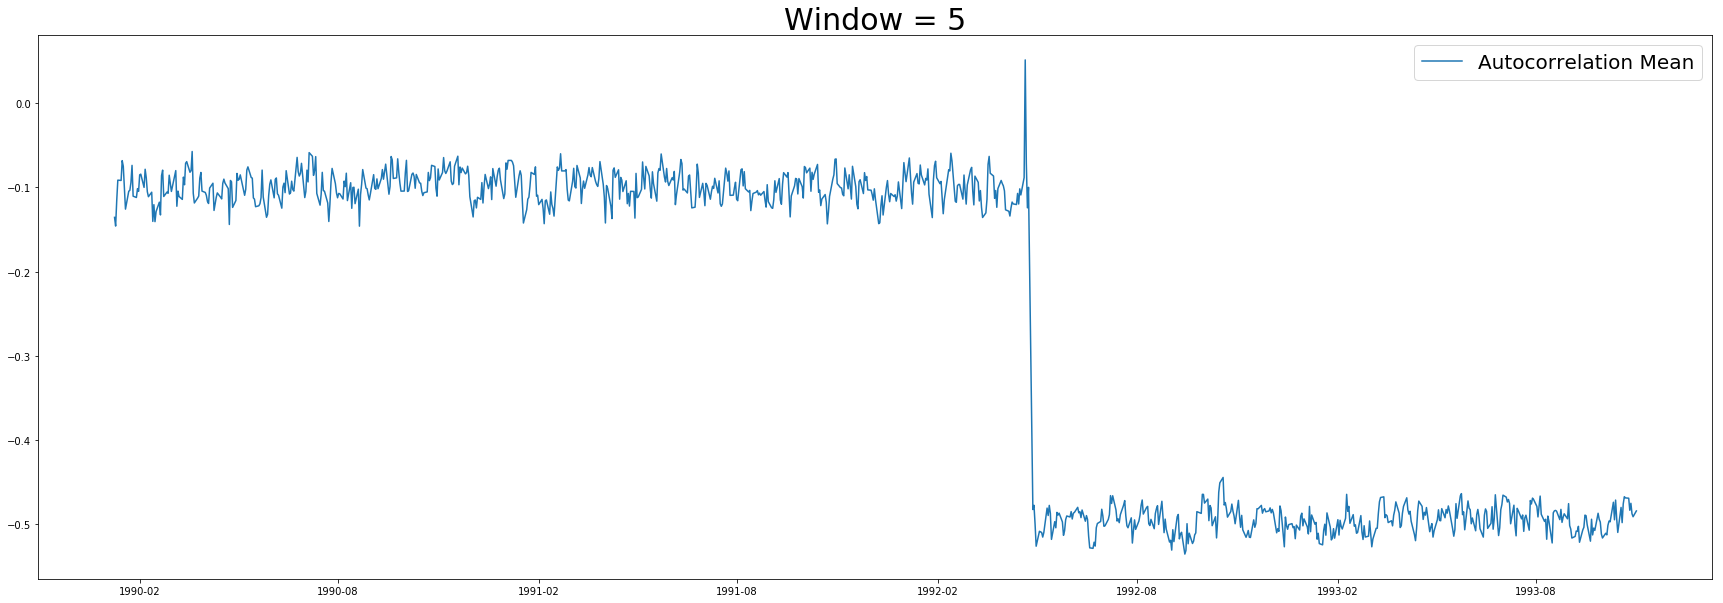

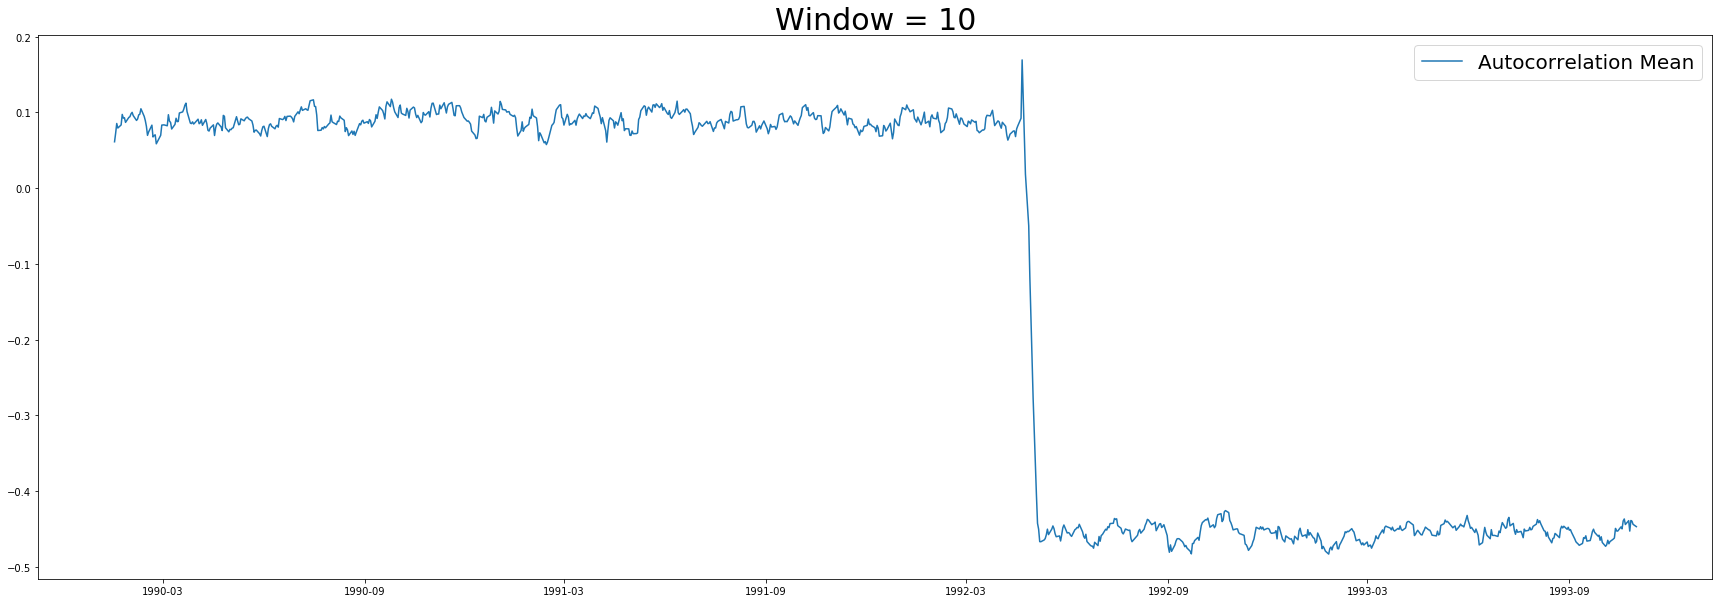

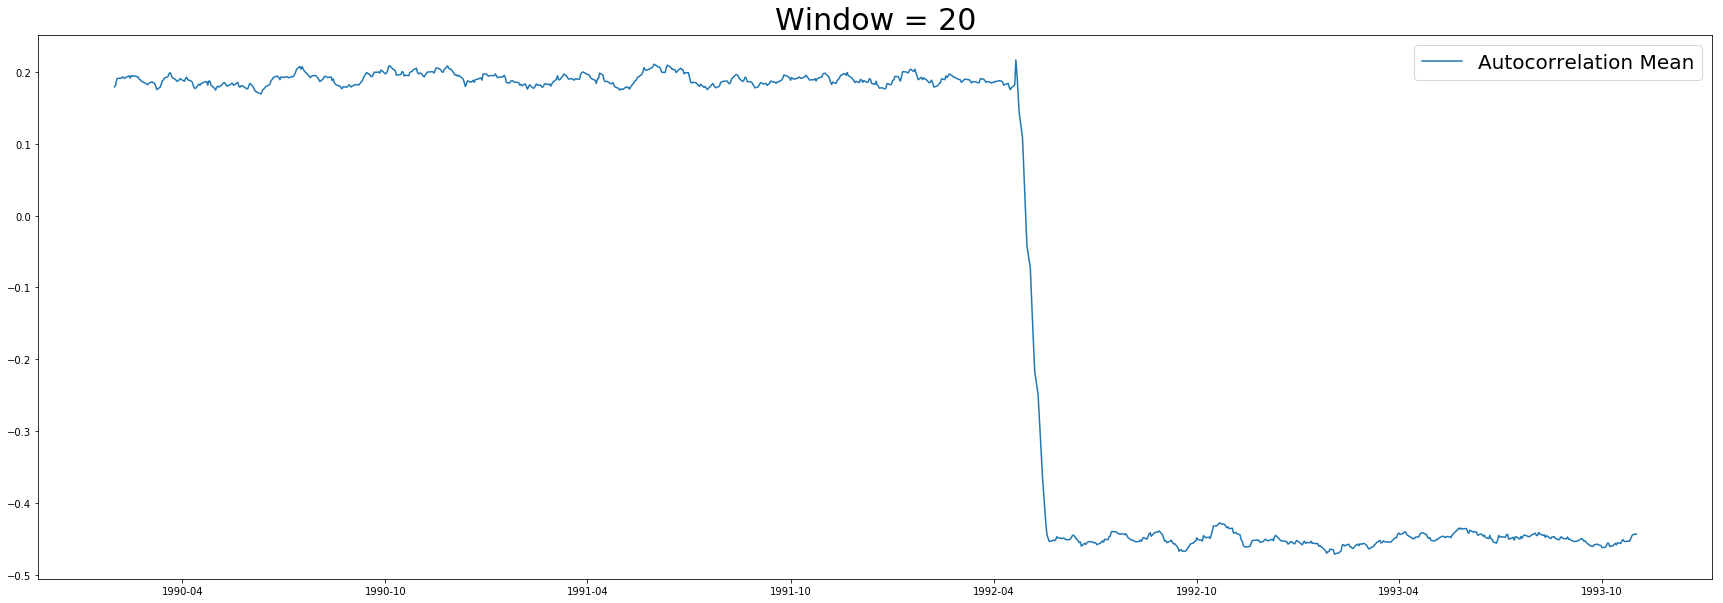

In [18]:
# since the question asks which month, we only check rolling window within a business month
window = [5, 10, 20] 
lag = 1
rslt = []
for win in window:
    rslt.append(rolling_autocorr(bd_idx, win, lag))
    plot(rslt[window.index(win)], win)

* Note that there is a sharp decline in the value of mean at arount 1992-04.

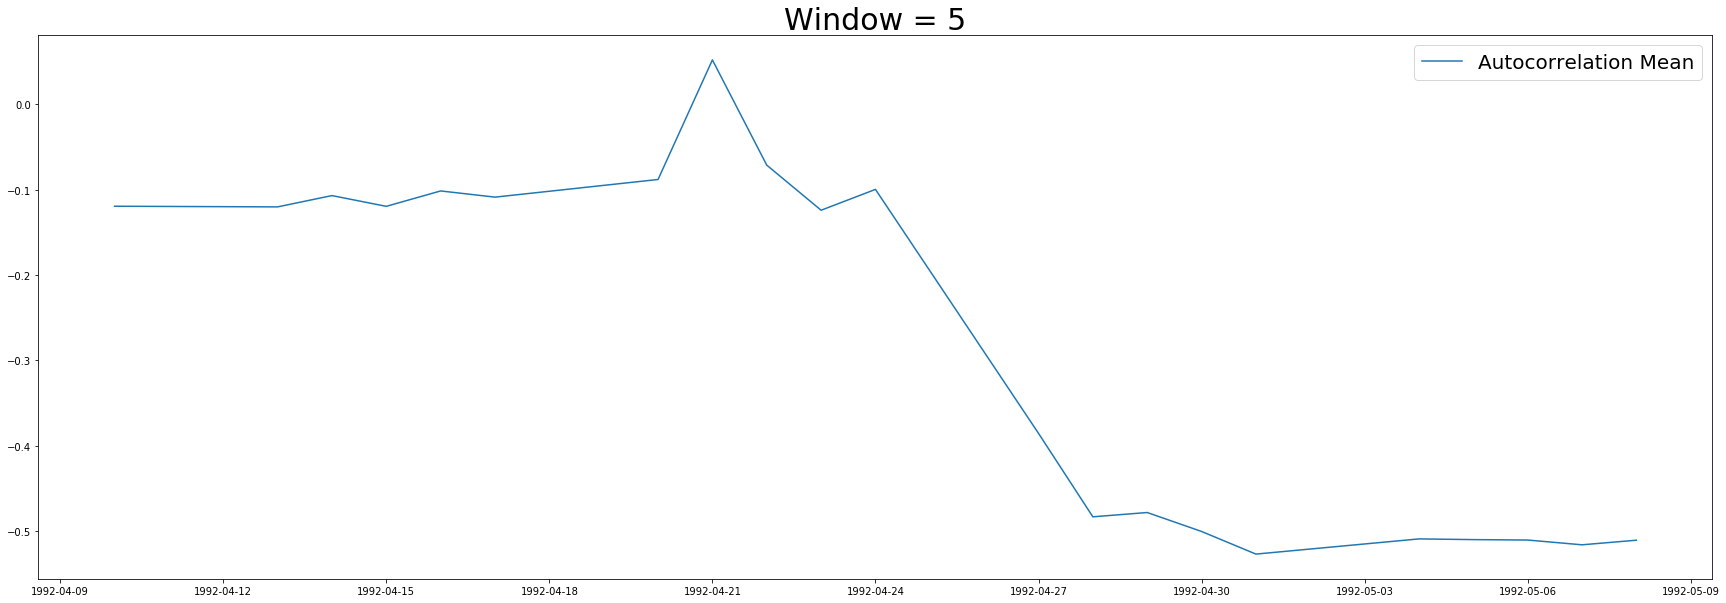

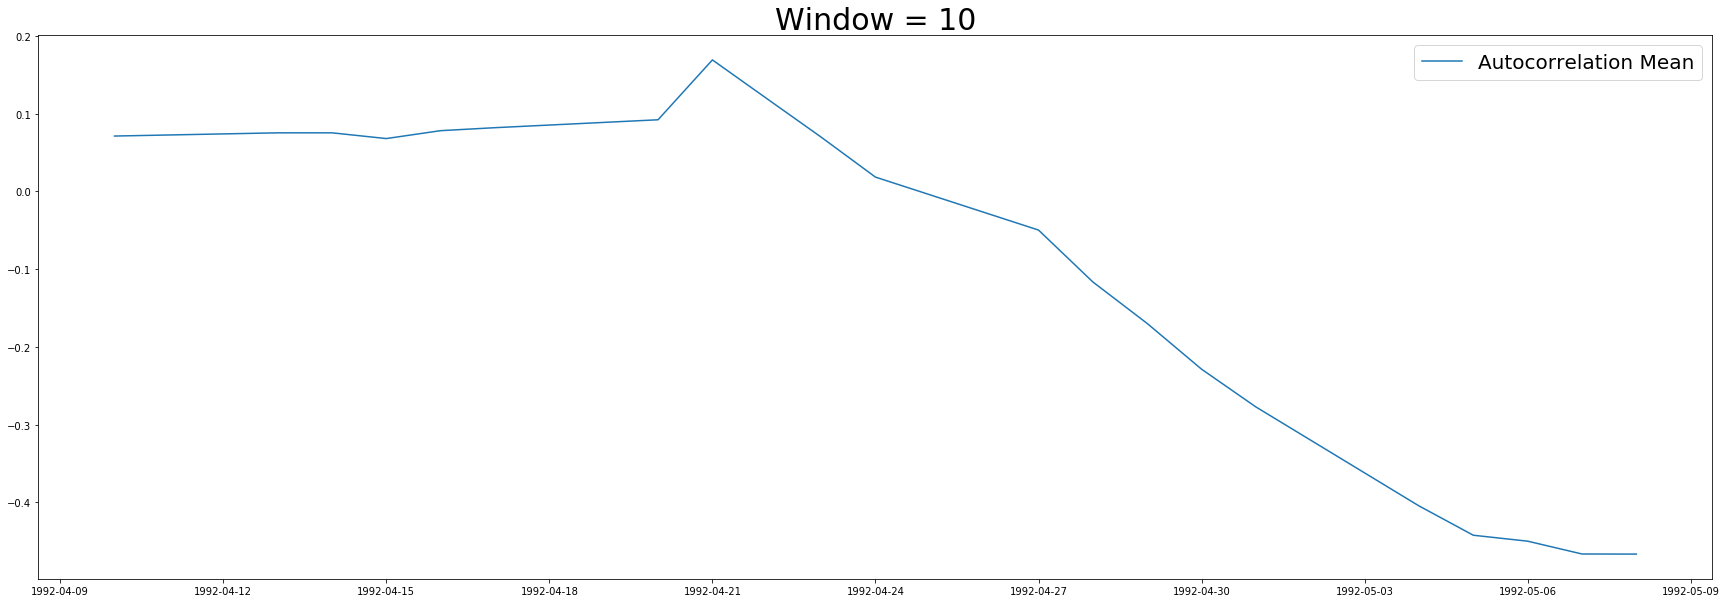

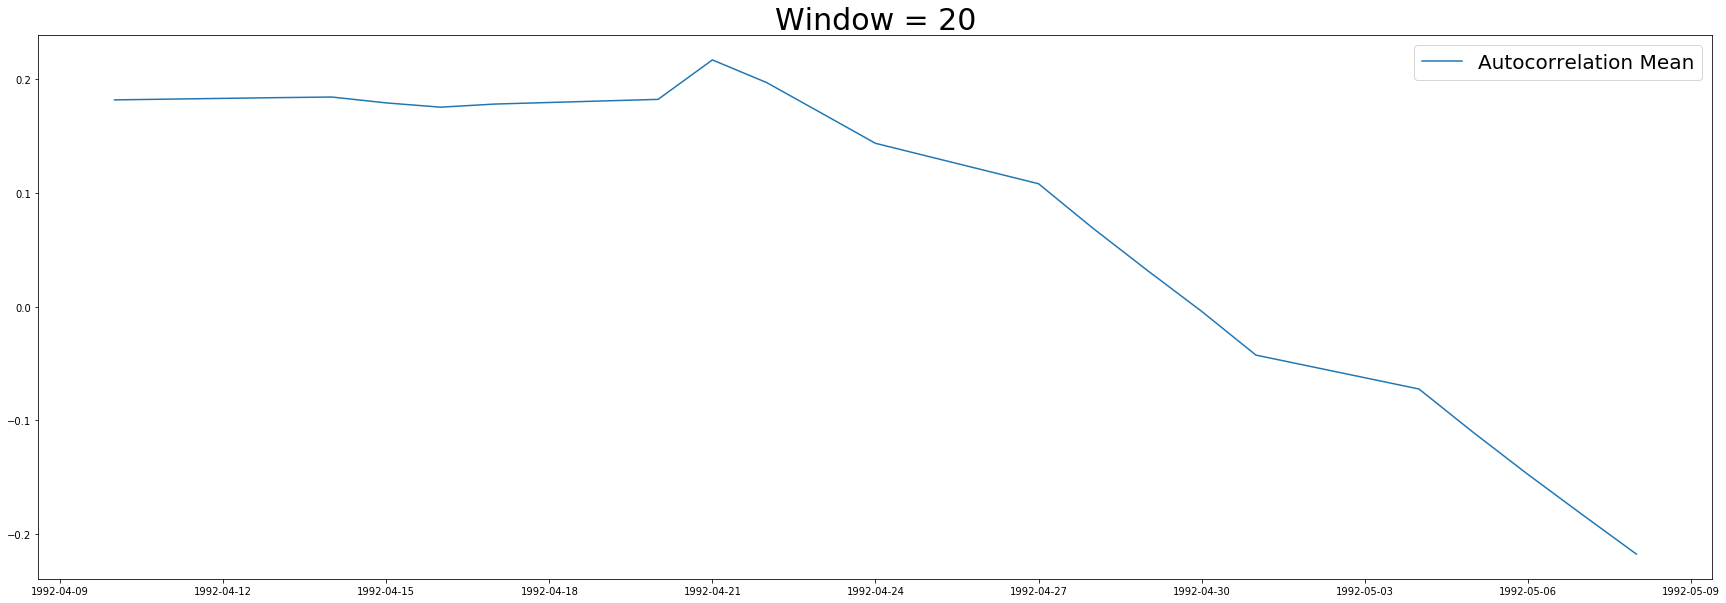

In [19]:
# Zoom in to the period '1992-04-10':'1992-05-10' to check
def plot2(df, win):
    mean = df.mean(1)
    figure = plt.figure(figsize = [30, 10])
    plt_mean = plt.plot(mean['1992-04-10':'1992-05-10'])
    plt.legend(['Autocorrelation Mean'], fontsize=20)
    plt.title("Window = " + str(win), fontsize=30)
    plt.show()
for win in window:
    plot2(rslt[window.index(win)], win)

* We can see that, on average, in **04-1992**, the mean of autocorrelation shifts from positive to negatice and thus we can conclude that **the returns shift from exhibiting momentum to exhibiting mean reversion**.

## Q2. During the time period when these stock returns had the momentum property, what was the average momentum? Please note this is a single number: the average across all stock returns in the time period.

From the plotted graphs above, we can be sure that before 1992-04-24,the stock returns had the momentum property, while after 1992-04-30, the stock returns had the mean reversion property.

In [20]:
mom = bd_idx[:'1992-04-24']
print("The average momentum during the period when these stock returns had the momentum property is: %0.6f" % 
      np.nanmean([mom[s].autocorr(lag=1) for s in mom.columns]) )

The average momentum during the period when these stock returns had the momentum property is: 0.280737


## Q3. During the time period when these stock returns exhibited mean reversion, what was the average mean reversion? Please note this is a single number: the average across all stock returns in the time period. 

Similar to Q2.

In [21]:
mr = bd_idx['1992-04-30':]
print("The average mean reversion during the period when these stock returns exhibited mean reversion is: %0.6f" % 
      np.nanmean([mr[s].autocorr(lag=1) for s in mr.columns]) )

The average mean reversion during the period when these stock returns exhibited mean reversion is: -0.458357


## Q4. Why might the market shift from momentum being dominant to mean reversion being dominant (or the other way around)? 

If we introduce the prevalent **Law of Supply and Demand** in economics to the stock market, we can define the equilibrium price for a stock. But stocks will fluctuate around the equilibrium price due to investors different judgments on different events or news. 

According to different fluctuations, we define the market as momentum dominant if stock returns continue to maintain positive(negative) if previously they were positive(negative); similarly, we define the market as mean reversion if stock returns continue to maintain positive(negative) if previously they were negative(positive).

Thus, to discuss Q4, we cannot leave the fundamental reasons -- participants and events or news.

In a usual market environment (no major news or mover in action), the market usually appear to be mean-reversion. The prevalent **Mean Reversion Theory** suggests that the stock price will eventually return back to its average or rational value in the long-run, but in the short-run, it will fluctuate between the converged value.

The momentum appears when events or news breaking out: the participants will gradually reach a consensus about the effects on the stock value -- this takes some time. Participants would decide whether to end the position based on their own new equilibrium price. But during this process, there are other types of participants, who may seize the opportunity to chase up/down in order to make profits, making the price over-valued/under-valued. However, when the price has gone beyond the new equilibrium price of main participants, they will start trade against the precious momentum -- change the direction of momentum.

This kind of switch between momentum and mean-reversion may happen a lot of times following a singular event and the frequency may be short as seconds or long as months due to the gaming between different participants. The market will return back to usual (mean reversion) when there is less consequence of the event, the price deviates less, and the price reaches a point where main participants can accept.

But for the data under consideration, we observed a 2.3-year momentum, followed by a 1.5-year mean-reversion with no interval changes in momentum, which is highly unlikely to happen in the real world, where big events break out weekly or even daily and switches of momentum directions happen frequently. But if we assume that this is a valid historical data, I would like to accept the potential fact that:
1. The market under consideration has more efficiency than that of the real world. With higher market efficiency (lower transaction costs and tax, more public and private information), the stock price will 'jump' to a new equilibrium where maintain mean-reversion (thus no switches between momentum and mean-reversion).
2. There are events happening every moment consecutively for the beginning 2.3 years and each has almost the same momentum. At some point during 1992-04, this consecutive event suddenly stopped and never shewed up again for even once in the following 1.5 years. (which is beyond our imagination of the current physical world)

## Q5. Why might trading momentum or mean reversion succeed as a strategy? Why might it fail? 

The principle of these two strategies is based on historical price-relate data, which is believed as an indicator for the future price.

### Momentum

#### Action
Long(short) in the holding period if the look-back period return is positive(negative).

#### Reasons for Success


First, **from economics principle**, **when events or news breaking out, it takes time for the participants to reach a consensus**. During this period, the market shows a status of momentum. For example, if main participants believe the increase of inflation rate will cause multiple economic problems, the market has high possibility to go bear and trader who believe this at the begining may have sold out or started holding short positions. But it takes some time for more data and infomation to support this judgement, and during such period, momentum strategy can be sucessful.

Sencond, **from the psychology of participants**, when events or news breaking out, the participants may exploit every piece of information to form their own altitudes for the market, affecting by **Anchoring Bias, Recency Bias, Hindsight Bias** and **Confirmation Bias**. When the participants started to trade, the **Bandwagon Effect** can lead the momentum trend stronger than it should be -- the participants are over-acting. When the impact of the event declined gradually, main participants may realize the over-reaction and hence turn around the direction of momentum, which may happed multiple times untill the all information is fulled digested and price reaches around the new equilibrium. 

Third, **from the point of risk**, Ruenzi and Weigert (2017) found the risk-based explanations for the momentum premium, which implies the premium is reliable since risk cannot be arbitraged away when arbitrageur act to correcct mispricing.

If a trader can recognize the flag of the momentum direction in the whole process, and trade and exit accordingly, this strategy could succeed.

#### Reasons for Failure

First, it is difficult to find the signal of momentum with a lot of other noises. Even if the signal is found, it might be a delayed piece of information. Also, due to **Herd Behavior**, participants may ignore their private signal and believe the public one.

Second, it does well in crashes while poorly when the market recovers. And crashes are relatively rare. It does poorly because it is trying to short the market losers, which are stocks having high beta -- fall slowly when encountered crisis but recover dramatically during recovery. 


### Mean-Reversion

#### Action
Long(short) in the holding period if the look-back period return is negative(positive).

#### Reasons for Success

First, because of the 'snap back' characteristic of the mean-reversion market, it takes a relatively short holding period. Also, traders can take advantage of short-term corrections to get back towards the average.

Second, there exist government interventions trying to bring the stock price back to its rational price. These kinds of actions may cause a momentum market to a mean-reversion market.

Third, instead of trading on singular stock/asset, we can compound multiple stocks/assets (usually two) linearly to make the price difference satisfying the Mean Reversion Theory, which is also known as **Pairs Trading**.

#### Reasons for Failure

First, it is not easy to estimate or quantify the price in equilibrium or mean of then price. Also, it is difficult to find situation where the return-to-mean period is long enough to make sure to make a profit with transaction costs.

Second, it earns smaller profits for each set of trade and exit. But it can cause a great amount of loss if there are events and news come out.

Third, the backtesting for mean-reversion strategy is not accurate enough. There are fake quoted prices in financial database.